In [27]:
import sys
import os
import numpy as np
from numpy import random as rd
import numpy as np
import pandas as pd
import pandas as pd
from scipy import stats
import re
import subprocess
import json
import multiprocessing, multiprocessing.pool
import matplotlib.pyplot as plt
import seaborn as sns
import time,datetime
from collections import Counter
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import miner_py3_kk as miner
import imp
#import miner
from tqdm.notebook import tqdm, trange
#imp.reload(miner)
%matplotlib inline
plt.style.use('ggplot')
print(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# Path to the miner directory
input_path = os.getcwd()
print("Current working directory: " + input_path)
    
resultsDirectory='/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST'
if not os.path.isdir(resultsDirectory):
    os.mkdir(resultsDirectory)

2021-11-13 22:58:27
Current working directory: /Users/serdarturkaslan/Documents/GitHub/GbmMINER/src


# Expression Data Processing

/Volumes/omics4tb2/SYGNAL/GBM-Serdar/MINER_MicroLowessRNATMM.08.24.2020-ST/data/GbmTCGALowessMicroarrayFilteredWithIDs.csv
Microarray data: (10676, 538)
RNASeq data: (15826, 171)
Common columns:161
RNASEq only columns:10
Microarray only columns:377
Merged Microarray and RNASeq data: (9728, 548)
miRNA data: (534, 530)
Combined data: (9728, 548)


SystemExit: 

/Users/serdarturkaslan/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3449: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


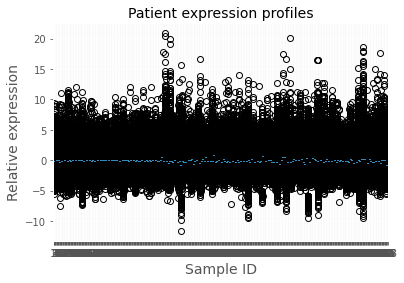

<Figure size 432x288 with 0 Axes>

In [8]:

## User defined variables
inputDataFile1 = resultsDirectory + '/data/GbmTCGALowessMicroarrayFilteredWithIDs.csv' # Microarray data
inputDataFile2 = resultsDirectory + '/data/GbmTCGATMMRNASeqFilteredWithGeneIDs.csv' # RNASeq data
inputDataFile3 = resultsDirectory + '/data/GBMTCGA_mirna_microarray_Filtered.csv' # miRNA data
print(inputDataFile1)
## Read expression data and conversion table        
expressionData1=pd.read_csv(inputDataFile1,header=0,index_col=0,sep=",")
expressionData2=pd.read_csv(inputDataFile2,header=0,index_col=0,sep=",")
print("Microarray data:", expressionData1.shape)
print("RNASeq data:", expressionData2.shape)

## Merge Microarray and RNASeq data and z-score them
cols_micro = set(expressionData1.columns)
cols_rna = set(expressionData2.columns)
cols_common = list(cols_rna.intersection(cols_micro))
cols_mrnaonly = list(cols_rna.difference(cols_micro))
cols_microonly = list(cols_micro.difference(cols_rna))

print("Common columns:" + str(len(cols_common)))
print("RNASEq only columns:" + str(len(cols_mrnaonly)))
print("Microarray only columns:" + str(len(cols_microonly)))
#sys.exit()

expressionData_rna = expressionData2[cols_mrnaonly+cols_common]
expressionData_micro = expressionData1[cols_microonly] 
expressionData = pd.merge(expressionData_rna, expressionData_micro, left_index = True, right_index = True)
expressionData = miner.zscore(expressionData)
expressionData.to_csv(resultsDirectory + "/data/GbmMicroRNAMergedWithIDsZScored.csv")
print("Merged Microarray and RNASeq data:", expressionData.shape)

## Process miRNA data
expressionData_1 = pd.read_csv(inputDataFile3,header=0,index_col=0,sep=",")
expressionData_miRNA = expressionData_1
cols_miRNAGeneExpCommon = list(expressionData.columns.intersection(expressionData_1.columns))
expressionData_miRNA = expressionData_miRNA[cols_miRNAGeneExpCommon]
expressionData_miRNA = miner.zscore(expressionData_miRNA)
expressionData_miRNA.to_csv(resultsDirectory + '/data/GbmMicroarrayZScoredmiRNAData.csv')
print("miRNA data:", expressionData_miRNA.shape)

## Combine all expression data
expressionData_FormiRNA = expressionData[cols_miRNAGeneExpCommon]
expressionData_FormiRNA = pd.concat([expressionData_FormiRNA, expressionData_miRNA])
expressionData_FormiRNA = miner.zscore(expressionData_FormiRNA)
expressionData_FormiRNA.to_csv(resultsDirectory + '/data/GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv')

print("Combined data:", expressionData.shape)
expressionData.head()

## Visualize the data
individual_expression_data = [expressionData.iloc[:,i] for i in range(50)]
_ = plt.boxplot(expressionData)
plt.title("Patient expression profiles",fontsize=14)
plt.ylabel("Relative expression",fontsize=14)
plt.xlabel("Sample ID",fontsize=14)
plt.figure()

sys.exit()

_ = plt.hist(expressionData.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,200)
plt.title("Expression of single patient sample",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)

In [38]:
expressionData = pd.read_csv(resultsDirectory + "/data/GbmMicroRNAMergedWithIDsZScored.csv", header=0,index_col=0,sep=",")
expressionData




,TCGA-14-1034.1,TCGA-06-0190.1,TCGA-19-4065.1,TCGA-06-0125.1,TCGA-02-0055,TCGA-06-0210.1,TCGA-06-AABW,TCGA-19-4065,TCGA-06-0211.1,TCGA-28-2499,...,TCGA-02-0456,TCGA-02-0269,TCGA-06-0397,TCGA-02-0043,TCGA-06-0413,TCGA-28-6450,TCGA-19-2623,TCGA-02-0079,TCGA-02-0281,TCGA-08-0349
ENSG00000283681,0.365340,0.859456,0.691551,0.804120,-0.063949,0.783231,1.287966,-0.145116,0.221032,-1.095594,...,0.148827,0.774041,-1.702493,-0.070572,1.447313,0.745617,0.982889,0.005778,1.400442,-1.002587
ENSG00000283630,-1.009928,-0.351957,-0.027208,-1.068849,1.158995,-0.617657,0.200077,0.562189,0.963349,0.472726,...,-0.880169,-0.508012,-0.109192,0.094321,0.015656,0.034153,1.123507,-3.855847,0.463121,0.018704
ENSG00000283590,0.552128,-0.748391,-0.329660,-0.999928,-1.074924,-0.908077,1.038520,-1.155707,-0.439210,-0.140862,...,-0.967255,0.394856,-0.412430,0.353109,-0.774273,-0.327461,-0.349840,1.494965,-1.439669,-0.513586
ENSG00000283530,-0.156090,-0.855818,0.111442,-0.447692,-0.786021,0.016428,1.272284,-0.899562,-0.874989,-0.914913,...,-0.725035,-0.185821,-0.963406,-1.296743,-0.397174,-0.388734,1.166285,0.405864,-0.862350,-0.378442
ENSG00000283494,0.336232,-0.884301,1.983644,0.362841,-0.172053,-0.825305,1.779626,-0.380914,-0.045445,-0.732519,...,0.531594,0.402358,-0.341277,-0.219411,0.584425,-0.914456,-0.155219,0.102553,-0.085131,0.158417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000000460,1.359074,0.914425,-0.774342,-1.278000,0.149360,0.095251,-1.869472,0.399595,0.192847,-1.558784,...,1.598972,0.104573,0.059672,-0.229645,0.869590,0.456252,1.911108,0.505371,-0.374221,0.452615
ENSG00000000457,1.384233,-0.609021,-1.203070,-0.343926,0.289068,-0.510084,1.030410,1.054926,0.060022,-0.919853,...,-0.332132,0.671936,-1.130524,2.037924,-0.014342,0.883297,-0.567201,-1.187497,-0.330499,-0.184599
ENSG00000000419,1.255467,0.493140,-0.117985,-1.166150,2.257780,-1.481455,-1.063548,1.250505,1.117161,-0.160586,...,0.848050,-0.506158,0.999860,0.130519,-0.267893,0.515554,-0.095078,-1.018946,-0.499471,-0.314698
ENSG00000000005,-0.177294,0.107915,-0.405752,-0.461856,4.750890,-0.256704,-0.461856,-0.422880,-0.461856,-0.327159,...,-0.589469,-0.247606,-0.593380,-0.294902,-0.360294,-0.566582,4.302339,-0.228156,-0.012230,0.478061


In [2]:
## User defined variablesex
expDataFile1 = resultsDirectory + '/data/GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredDatamiRNAEnsembl.csv' 

## Read expression data and conversion table        
expressionData=pd.read_csv(expDataFile1,header=0,index_col=0,sep=",")

#expressionData = miner.zscore(expressionData)

print("Expression data:", expressionData.shape)
expressionData.head

Expression data: (10262, 530)


<bound method NDFrame.head of                    TCGA-02-0055  TCGA-19-2620  TCGA-14-1825  TCGA-06-5412  \
geneID                                                                      
ebv-mir-bart10        -0.318624     -0.407976     -0.250857     -0.866190   
ebv-mir-bart11-3p     -0.620456      0.126319     -0.282455     -0.460887   
ebv-mir-bart11-5p      0.860420      0.036682      0.283258     -0.167459   
ebv-mir-bart12        -0.199613     -0.262259     -0.304161     -0.544222   
ebv-mir-bart13         0.208001     -0.507458      0.356541      0.848717   
...                         ...           ...           ...           ...   
kshv-mir-k12-6-5p      0.353900     -0.071089      0.045531     -0.607997   
kshv-mir-k12-7        -0.154095     -0.460676     -0.488718      0.293430   
kshv-mir-k12-8         0.419916      0.098197      0.077835      0.180349   
kshv-mir-k12-9         0.496802      0.305234      0.795270     -0.196361   
kshv-mir-k12-9*        2.030388     -0.341324 

Text(0.5, 0, 'Relative expression')

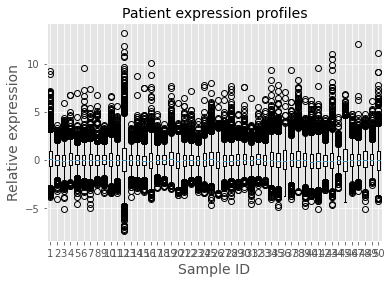

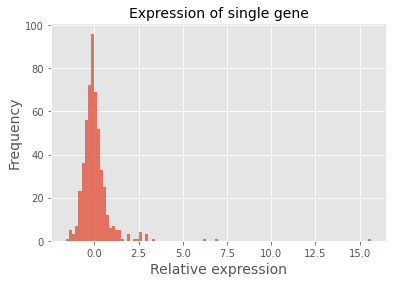

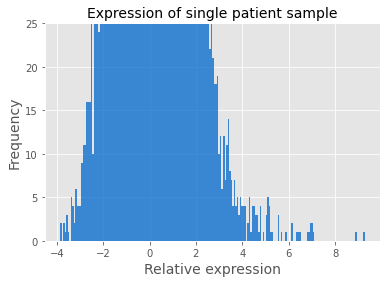

In [3]:
##visualize pre-processed expression data miRNA
individual_expression_data = [expressionData.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",fontsize=14)
plt.ylabel("Relative expression",fontsize=14)
plt.xlabel("Sample ID",fontsize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)
plt.figure()
_ = plt.hist(expressionData.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,25)
plt.title("Expression of single patient sample",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)

Text(0.5, 0, 'Relative expression')

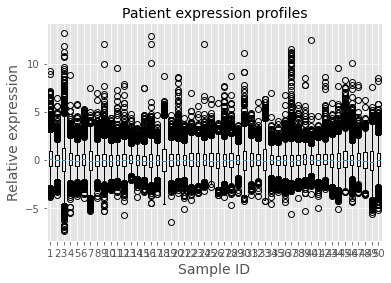

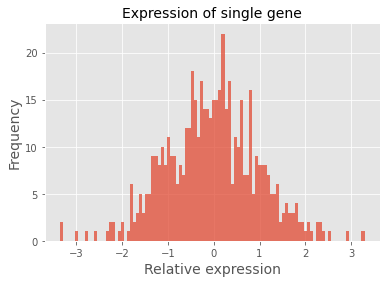

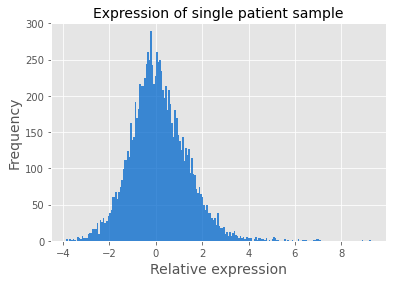

In [5]:
##visualize pre-processed expression data
individual_expression_data = [expressionData_FormiRNA.iloc[:,i] for i in range(50)]
_ = plt.boxplot(individual_expression_data)
plt.title("Patient expression profiles",fontsize=14)
plt.ylabel("Relative expression",fontsize=14)
plt.xlabel("Sample ID",fontsize=14)
plt.figure()
_ = plt.hist(expressionData_FormiRNA.iloc[0,:],bins=100,alpha=0.75)
plt.title("Expression of single gene",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)
plt.figure()
_ = plt.hist(expressionData_FormiRNA.iloc[:,0],bins=200,color=[0,0.4,0.8],alpha=0.75)
plt.ylim(0,300)
plt.title("Expression of single patient sample",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xlabel("Relative expression",fontsize=14)

# Gene expression clustering

Performing Initial clustering..

Running cluster function...



  0%|          | 0/5 [00:00<?, ?it/s]

0.00 percent complete
20.00 percent complete
40.00 percent complete
60.00 percent complete
80.00 percent complete

coexpression clustering completed in 0.96 minutes
Performing Revised clustering..

Completed coexpression clustering in 1.23 minutes
Number of genes clustered: 9056
Number of unique clusters: 632
Completed clustering module in 1.24 minutes


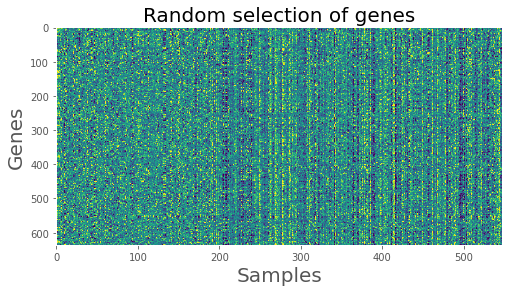

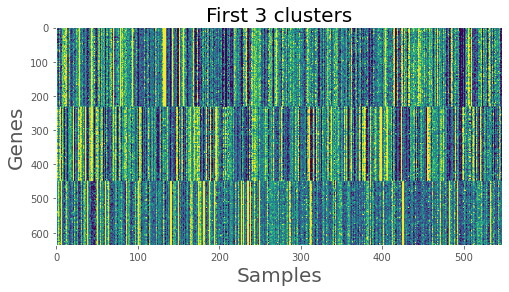

In [39]:
imp.reload(miner)
# minimum number of genes that form an acceptable coexpression cluster:
minNumberGenes = 6 #bulk RNAseq default=6;single cell RNAseq default=6

# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05

# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4

# choose database: if supplying your own database, use mechanistic_database = reference_mechanistic_database
mechanistic_database = resultsDirectory + "/data/tfbsdb_tf_to_genes.pkl" #default option
#mechanistic_database = reference_mechanistic_database #use if supplying your own database

# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()

# Network inference may take several minutes. 
# Prompts will print at 0, 20, 40, 60, 80, and 100% complete

t1 = time.time()
print("Performing Initial clustering..\n")
# generate a list of coexpressed gene clusters, all of which have length >= minNumberGenes
initialClusters = miner.cluster(expressionData,minNumberGenes = minNumberGenes,minNumberOverExpSamples=4,maxSamplesExcluded=0.50,random_state=17,overExpressionThreshold=80) 

print("Performing Revised clustering..\n")
# revise initialClusters to combine highly correlated clusters and keep only those with significant coexpression
revisedClusters = miner.reviseInitialClusters(initialClusters,expressionData)

# write revisedClusters to .json file
miner.write_json(revisedClusters,os.path.join(resultsDirectory,"output/coexpressionDictionary.json"))

t2 = time.time()
print("Completed coexpression clustering in {:.2f} minutes".format((t2-t1)/60.))

# retrieve first three clusters for visual inspection
first_clusters = np.hstack([revisedClusters[i] for i in np.arange(3).astype(str)])

# visualize background expression
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[np.random.choice(
    expressionData.index,len(first_clusters),
    replace=False),:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",fontsize=20)
plt.xlabel("Samples",fontsize=20)
plt.title("Random selection of genes",fontsize=20)

# visualize first 10 clusters
plt.figure(figsize=(8,4))
plt.imshow(expressionData.loc[first_clusters,:],aspect="auto",cmap="viridis",vmin=-1,vmax=1)
plt.grid(False)
plt.ylabel("Genes",fontsize=20)
plt.xlabel("Samples",fontsize=20)
plt.title("First 3 clusters",fontsize=20)

# report coverage
print("Number of genes clustered: {:d}".format(len(set(np.hstack(initialClusters)))))
print("Number of unique clusters: {:d}".format(len(revisedClusters)))

t3 = time.time()
print("Completed clustering module in {:.2f} minutes".format((t3-t1)/60.))


# Mechanistic inference

In [40]:
imp.reload(miner)
t1 = time.time()

# get first principal component axes of clusters
input_path = os.getcwd()
revisedClusters = miner.read_json(os.path.join(resultsDirectory,"output/coexpressionDictionary.json"))

# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4
axes = miner.principalDf(revisedClusters,expressionData,subkey=None,minNumberGenes=1)
database_path = resultsDirectory + "/data/tfbsdb_tf_to_genes.pkl"

# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05

# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()

# analyze revised clusters for enrichment in relational database (default: transcription factor binding site database)
mechanisticOutput = miner.mechanisticInference(axes,revisedClusters,expressionData,correlationThreshold=minCorrelation,numCores=numCores,database=database_path)

# write mechanistic output to .json file
miner.write_json(mechanisticOutput,os.path.join(resultsDirectory,"output/mechanisticOutput.json"))

# order mechanisticOutput as {tf:{coexpressionModule:genes}} 
coregulationModules = miner.getCoregulationModules(mechanisticOutput)

# write coregulation modules to .json file
miner.write_json(coregulationModules,os.path.join(resultsDirectory,"output/coregulationModules.json"))

# get final regulons by keeping genes that frequently appear coexpressed and associated to a common regulator
regulons = miner.getRegulons(coregulationModules,minNumberGenes=minNumberRegulonGenes,freqThreshold = 0.333)

# reformat regulon dictionary for consistency with revisedClusters and coexpressionModules
regulonModules, regulonDf = miner.regulonDictionary(regulons)

# write regulonDf to csv using preferred gene name identifiers
regulonDf.to_csv(os.path.join(resultsDirectory,"output/regulonDf.csv"))

# write regulons to json file
miner.write_json(regulonModules,os.path.join(resultsDirectory,"output/regulons.json"))

# define coexpression modules as composite of coexpressed regulons
coexpressionModules = miner.getCoexpressionModules(mechanisticOutput)

# write coexpression modules to .json file
miner.write_json(coexpressionModules,os.path.join(resultsDirectory,"output/coexpressionModules.json"))

# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#write eigengenes to .csv
eigengenes.to_csv(os.path.join(resultsDirectory,"output/eigengenes.csv"))

t2 = time.time()
print("Completed mechanistic inference in {:.2f} minutes".format((t2-t1)/60.))
print("Inferred network with {:d} regulons, {:d} TF regulators, and {:d} co-regulated genes".format(len(regulonDf.Regulon_ID.unique()),len(regulonDf.Regulator.unique()),len(regulonDf.Gene.unique())))
print("Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes")

Running mechanistic inference


/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:1289: RuntimeWarning: invalid value encountered in greater_equal
  tfDict[tfDict_key] = tfs[np.where(np.abs(tfCorrelation)>=correlationThreshold)[0]]


Completed mechanistic inference in 3.52 minutes
Inferred network with 3832 regulons, 431 TF regulators, and 6803 co-regulated genes
Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes


### fikltering for regulons sig

In [55]:
imp.reload(miner)
t1 = time.time()

# get first principal component axes of clusters
input_path = os.getcwd()
revisedClusters = miner.read_json(os.path.join(resultsDirectory,"output/coexpressionDictionary.json"))

# minimum number of genes that form an acceptable coexpression cluster and have share binding site for regulator:
minNumberRegulonGenes = 5 #bulk RNAseq default=5;single cell RNAseq default=4
axes = miner.principalDf(revisedClusters,expressionData,subkey=None,minNumberGenes=1)
database_path = resultsDirectory + "/data/tfbsdb_tf_to_genes.pkl"

# minimum correlation coefficient for an acceptable regulator-cluster association 
minCorrelation = 0.2 #bulk RNAseq default=0.2;single cell RNAseq default=0.05

# number of cores available for multiprocessing
import multiprocessing
numCores = multiprocessing.cpu_count()

# analyze revised clusters for enrichment in relational database (default: transcription factor binding site database)
mechanisticOutput = miner.mechanisticInference(axes,revisedClusters,expressionData,correlationThreshold=minCorrelation,numCores=numCores,database=database_path)

# write mechanistic output to .json file
#miner.write_json(mechanisticOutput,os.path.join(resultsDirectory,"output/mechanisticOutput.json"))

# order mechanisticOutput as {tf:{coexpressionModule:genes}} 
coregulationModules = miner.getCoregulationModules(mechanisticOutput)

# write coregulation modules to .json file
#miner.write_json(coregulationModules,os.path.join(resultsDirectory,"output/coregulationModules.json"))

# get final regulons by keeping genes that frequently appear coexpressed and associated to a common regulator
regulons = miner.getRegulons(coregulationModules,minNumberGenes=minNumberRegulonGenes,freqThreshold = 0.333)

# reformat regulon dictionary for consistency with revisedClusters and coexpressionModules
regulonModules, regulonDf = miner.regulonDictionary(regulons)


# Load regulon Modules
regulonModules = miner.read_json(os.path.join(resultsDirectory,"output/regulons.json"))
regulonDfMicroGbmLatest = pd.read_csv(os.path.join(resultsDirectory,"output/regulonDfGbmMicroRNASigCoxAndStatSig.csv"), header = 0)
regulonDfMicroGbmLatest = list(regulonDfMicroGbmLatest['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmLatest = [str(i) for i in regulonDfMicroGbmLatest]
regulonModules = dict((k, regulonModules[k]) for k in regulonDfMicroGbmLatest if k in regulonModules)

# create regulon dictionary
referenceDictionary = regulonModules
print()
print("Loaded " + str(len(referenceDictionary)) + " Regulons.")

# write regulonDf to csv using preferred gene name identifiers
#regulonDf.to_csv(os.path.join(resultsDirectory,"output/regulonDf.csv"))

# write regulons to json file
#miner.write_json(regulonModules,os.path.join(resultsDirectory,"output/regulons.json"))

# define coexpression modules as composite of coexpressed regulons
coexpressionModules = miner.getCoexpressionModules(mechanisticOutput)

# write coexpression modules to .json file
#miner.write_json(coexpressionModules,os.path.join(resultsDirectory,"output/coexpressionModules.json"))

# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#write eigengenes to .csv
#eigengenes.to_csv(os.path.join(resultsDirectory,"output/eigengenes.csv"))

t2 = time.time()
print("Completed mechanistic inference in {:.2f} minutes".format((t2-t1)/60.))
print("Inferred network with {:d} regulons, {:d} TF regulators, and {:d} co-regulated genes".format(len(regulonDf.Regulon_ID.unique()),len(regulonDf.Regulator.unique()),len(regulonDf.Gene.unique())))
print("Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes")

Running mechanistic inference


/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:1289: RuntimeWarning: invalid value encountered in greater_equal
  tfDict[tfDict_key] = tfs[np.where(np.abs(tfCorrelation)>=correlationThreshold)[0]]



Loaded 505 Regulons.
Completed mechanistic inference in 2.76 minutes
Inferred network with 3832 regulons, 431 TF regulators, and 6803 co-regulated genes
Inferred network with 3764 regulons, 428 TF regulators, and 6781 co-regulated genes


# Causal Inference

In [46]:
imp.reload(miner)
#regulonDfMicroGbm = pd.read_csv("regulonDf.csv", header = 0)
#regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
#regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
#regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
#regulonModules = {}
#for i in regulonDfMicroGbmlist:
#    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
#expressionData = pd.read_csv("GbmMicroRNAMergedWithIDsZScored.csv", header = 0, index_col = 0)
#eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
#eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
#eigengenes = eigenScale*eigengenes
#eigengenes.index = np.array(eigengenes.index).astype(str)
#referenceDf = eigengenes.copy()
#referenceRegulonDf = regulonDfMicroGbm
referenceRegulonDf = regulonDf
referenceDf = eigengenes

common_mutations_file = os.path.join(resultsDirectory, "data/mutations.GBM.TCGA.2019.05.01.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

common_mutations_file = os.path.join(resultsDirectory, "data/SignificantSomaticMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")

common_mutations_file = os.path.join(resultsDirectory, "data/NonSilentPathwayMutationsGbmRNAAndMicroarray07242020.csv")
common_mutations = pd.read_csv(common_mutations_file,index_col=0,header=0)
mut_matrix = common_mutations.copy()
miner.causalNetworkAnalysis(regulon_matrix=referenceRegulonDf.copy(),expression_matrix=expressionData.copy(),reference_matrix=referenceDf.copy(),mutation_matrix=mut_matrix,resultsDirectory=os.path.join(resultsDirectory,"causal_analysis"),minRegulons=1,significance_threshold=0.05,causalFolder="causal_results_common_mutations")


KeyboardInterrupt: 

In [9]:
# compile all causal results
causal_directory = os.path.join(resultsDirectory,"causal_analysis")
causal_results = miner.readCausalFiles(causal_directory)
causal_results.to_csv(os.path.join(resultsDirectory,"output/completeCausalResults.csv"))
print(causal_results.shape)

# filtered causal results
causal_results_regulon_filtered = causal_results[causal_results["-log10(p)_Regulon_stratification"]>=-np.log10(0.05)]
causal_results_aligned = causal_results_regulon_filtered[causal_results_regulon_filtered.Fraction_of_edges_correctly_aligned>=0.5]
causal_results_aligned_correlated = causal_results_aligned[causal_results_aligned["RegulatorRegulon_Spearman_p-value"]<=0.05]
causal_results_stratified_aligned_correlated = causal_results_aligned_correlated[causal_results_aligned_correlated["-log10(p)_MutationRegulatorEdge"]>=-np.log10(0.05)]

# for all causal flows, 
# the regulon is differentially active w.r.t the mutation,
# the regulator is differentially active w.r.t the mutation,
# the regulator is significantly correlated to the regulon,
# and the directionality of at least half of the differentially active targets 
# downstream of the regulator are consistent with the perturbation from the mutation

causal_results_stratified_aligned_correlated.to_csv(os.path.join(resultsDirectory,"output/filteredCausalResults.csv"))
print(causal_results_stratified_aligned_correlated.shape)

(27830, 10)
(27445, 10)


# Network Mapping

In [49]:
#imp.reload(miner)
t1 = time.time()
# select reference dictionary for downstream analysis (revisedClusters, coexpressionModules, or regulonModules)
referenceDictionary = regulonModules

# create a background matrix used for statistical hypothesis testing
bkgd = miner.backgroundDf(expressionData)

# for each cluster, give samples that show high coherent cluster activity
overExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=2,p=0.05)

# for each clus|ter, give samples that show low coherent cluster activity
underExpressedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label=0,p=0.05)

# for each cluster, give samples that do not show coherent cluster activity
dysregulatedMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="excluded")

# # for each cluster, give samples that show coherent cluster activity, despite magnitude of expression
coherentMembers = miner.biclusterMembershipDictionary(referenceDictionary,bkgd,label="included")

# write membership matrices to .csv file
overExpressedMembersMatrix = miner.membershipToIncidence(overExpressedMembers,expressionData)
overExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"output/overExpressedMembersmiRNAAndTFRegulonsSig.csv"))
underExpressedMembersMatrix = miner.membershipToIncidence(underExpressedMembers,expressionData)
underExpressedMembersMatrix.to_csv(os.path.join(resultsDirectory,"output/underExpressedMembersmiRNAAndTFRegulonsSig.csv"))
dysregulatedMembersMatrix = miner.membershipToIncidence(dysregulatedMembers,expressionData)
dysregulatedMembersMatrix.to_csv(os.path.join(resultsDirectory,"output/dysregulatedMembersmiRNAAndTFRegulonsSig.csv"))
coherentMembersMatrix = miner.membershipToIncidence(coherentMembers,expressionData)
coherentMembersMatrix.to_csv(os.path.join(resultsDirectory,"output/coherentMembersmiRNAAndTFRegulonsSig.csv"))

t2 = time.time()
print("Completed patient mapping in {:.2f} minutes".format((t2-t1)/60.))

biclusterMembershipDictionary is done!
biclusterMembershipDictionary is done!
Completed Bicluster Membership dictionary for excluded. done!
Completed Bicluster Membership dictionary for included. done!
Completed patient mapping in 0.22 minutes


Text(0.5, 0, 'Samples')

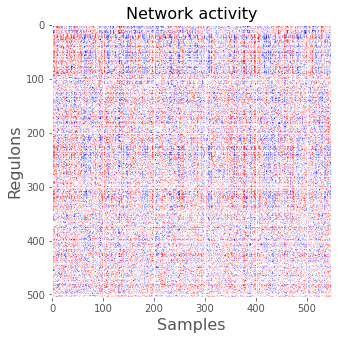

In [50]:
#visualize network activity across individual samples
plt.figure(figsize=(5,5))
network_activity_heatmap = overExpressedMembersMatrix-underExpressedMembersMatrix
plt.imshow(network_activity_heatmap,cmap="bwr",vmin=-1,vmax=1,aspect="auto")
plt.title("Network activity",fontsize=16)
plt.ylabel("Regulons",fontsize=16)
plt.xlabel("Samples",fontsize=16)

# Infer patient sub-types

In [43]:
# Infer transcriptional states
minClusterSize = int(np.ceil(0.01*expressionData.shape[1]))
referenceMatrix = overExpressedMembersMatrix-underExpressedMembersMatrix
primaryMatrix = overExpressedMembersMatrix
print(primaryMatrix.shape)
primaryDictionary = overExpressedMembers

secondaryMatrix = underExpressedMembersMatrix
secondaryDictionary = underExpressedMembers

(3832, 548)


In [51]:
# Infer transcriptional states
minClusterSize = int(np.ceil(0.01*expressionData.shape[1]))
referenceMatrix = overExpressedMembersMatrix-underExpressedMembersMatrix
primaryMatrix = overExpressedMembersMatrix
primaryDictionary = overExpressedMembers
secondaryMatrix = underExpressedMembersMatrix
secondaryDictionary = underExpressedMembers

states, centroidClusters = miner.inferSubtypes(referenceMatrix,primaryMatrix,secondaryMatrix,primaryDictionary,secondaryDictionary,minClusterSize = int(np.ceil(0.01*expressionData.shape[1])),restricted_index=None)
states_dictionary = {str(i):states[i] for i in range(len(states))}
miner.write_json(states_dictionary,os.path.join(resultsDirectory,"output/transcriptional_states.json"))

# # Infer transcriptional states
# #imp.reload(miner)
# minClusterSize = int(np.ceil(0.01*expressionData.shape[1]))
# referenceMatrix = overExpressedMembersMatrix-underExpressedMembersMatrix
# primaryMatrix = overExpressedMembersMatrix
# primaryDictionary = overExpressedMembers
# secondaryMatrix = underExpressedMembersMatrix
# secondaryDictionary = underExpressedMembers

# states, centroidClusters = miner.inferSubtypes(referenceMatrix,primaryMatrix,secondaryMatrix,primaryDictionary,secondaryDictionary,minClusterSize = int(np.ceil(0.01*expressionData.shape[1])),restricted_index=None)
# states_dictionary = {str(i):states[i] for i in range(len(states))}
# print(states_dictionary)
# miner.write_json(states_dictionary,os.path.join(resultsDirectory,"transcriptional_statesmiRNAAndTFSig.json"))

Beginning subtype inference
completed subtype inference in 0.23 minutes


/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2038: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Regulons",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2039: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)


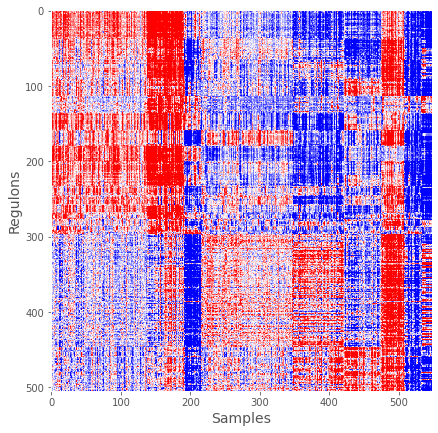

In [52]:
# Infer transcriptional programs
reference_df = eigengenes.copy()
programs, _ = miner.mosaic(dfr=reference_df,clusterList=centroidClusters,minClusterSize_x=int(np.ceil(0.01*expressionData.shape[1])),minClusterSize_y=5,allow_singletons=False,max_groups=50,saveFile=os.path.join(resultsDirectory,"regulon_activity_heatmap.pdf"),random_state=12)   
transcriptional_programs, program_regulons = miner.transcriptionalPrograms(programs,referenceDictionary)
program_list = [program_regulons[("").join(["TP",str(i)])] for i in range(len(program_regulons))]
programs_dictionary = {str(i):program_list[i] for i in range(len(program_list))}
miner.write_json(programs_dictionary,os.path.join(resultsDirectory,"output/transcriptional_programs.json"))
mosaicDf = reference_df.loc[np.hstack(program_list),np.hstack(states)]
mosaicDf.to_csv(os.path.join(resultsDirectory,"output/regulons_activity_heatmap.csv"))

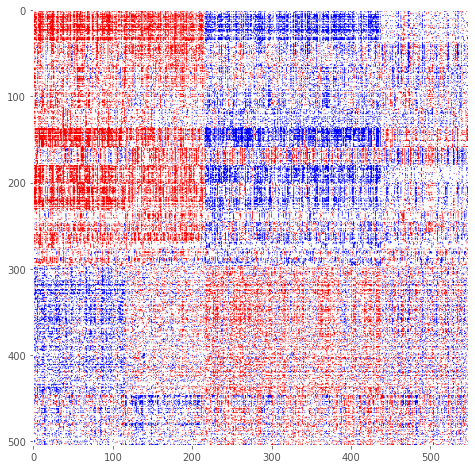

In [53]:
dfr = overExpressedMembersMatrix-underExpressedMembersMatrix
mtrx = dfr.loc[np.hstack(program_list),np.hstack(states)]
plt.figure(figsize=(8,8))
plt.imshow(mtrx,cmap="bwr",vmin=-1,vmax=1,aspect=float(mtrx.shape[1])/float(mtrx.shape[0]))
plt.grid(False)
plt.savefig(os.path.join(resultsDirectory,"output/mosaic_all.pdf"),bbox_inches="tight")

/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2880: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Transcriptional programs",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2881: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2904: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("Transcriptional programs",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2905: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Tr

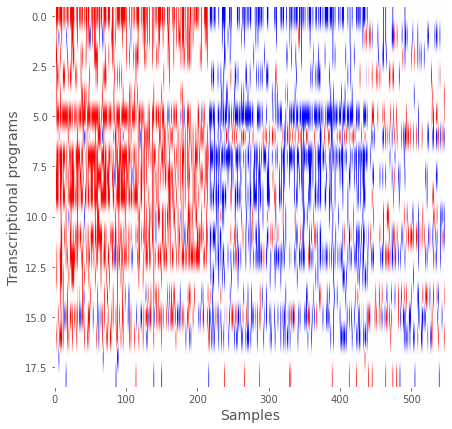

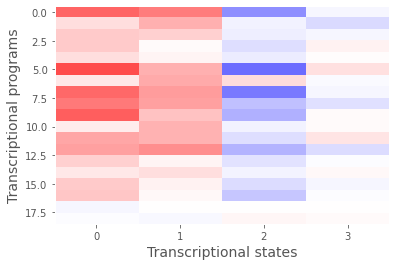

In [54]:
# Determine activity of transcriptional programs in each sample
statesDf = miner.reduceModules(df=dfr.loc[np.hstack(program_list),np.hstack(states)],programs=program_list,states=states,stateThreshold=0.50,saveFile=os.path.join(resultsDirectory,"output/transcriptional_programs.pdf"))

# Cluster patients into subtypes and give the activity of each program in each subtype
programsVsStates = miner.programsVsStates(statesDf,states,filename=os.path.join(resultsDirectory,"output/programs_vs_states.pdf"),showplot=True)

# Transcriptional programs - Only for training data

/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2038: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Regulons",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2039: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)


{'0': ['13', '45', '55', '68', '78', '95', '102', '105', '114', '118', '125', '139', '143', '171', '183', '219', '247', '273', '283', '402', '505', '511', '587', '678', '728', '748', '752', '757', '765', '774', '778', '783', '789', '805', '810', '834', '860', '871', '891', '901', '920', '929', '945', '949', '960', '973', '983', '992', '1017', '1031', '1039', '1049', '1062', '1079', '1080', '1082', '1085', '1086', '1098', '1099', '1109', '1112', '1116', '1125', '1131', '1143', '1168', '1188', '1193', '1209', '1218', '1221', '1228', '1243', '1260', '1268', '1271', '1275', '1277', '1301', '1305', '1310', '1335', '1344', '1352', '1367', '1386', '1387', '1389', '1401', '1418', '1442', '1452', '1477', '1488', '1501', '1502', '1507', '1514', '1521', '1525', '1536', '1537', '1542', '1555', '1568', '1587', '1611', '1624', '1636', '1648', '1656', '1660', '1661', '1674', '1676', '1826', '1846', '2003', '2114', '2229', '2481', '2662', '2666', '2886', '2973', '3077', '3097', '3099', '3208', '3244',

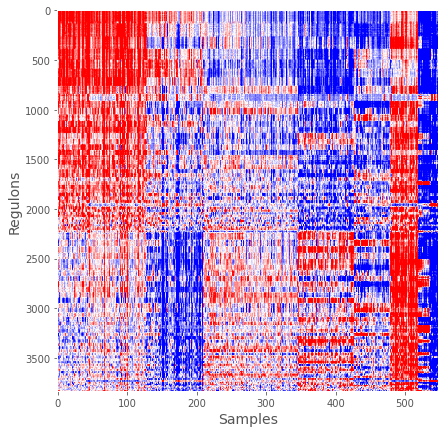

In [33]:
# Infer transcriptional programs
# Get eigengenes for all modules
eigengenes = miner.getEigengenes(regulonModules,expressionData,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
reference_df = eigengenes.copy()
eigengenes.to_csv(os.path.join(resultsDirectory,"output/eigengenesmiRNAAndTFSig.csv"))
programs, _ = miner.mosaic(dfr=reference_df,clusterList=centroidClusters,minClusterSize_x=int(np.ceil(0.01*expressionData.shape[1])),minClusterSize_y=5,allow_singletons=False,max_groups=50,saveFile=os.path.join(resultsDirectory,"regulon_activity_heatmapmiRNAAndTFSig.pdf"),random_state=12)   
transcriptional_programs, program_regulons = miner.transcriptionalPrograms(programs,referenceDictionary)
program_list = [program_regulons[("").join(["TP",str(i)])] for i in range(len(program_regulons))]
programs_dictionary = {str(i):program_list[i] for i in range(len(program_list))}
miner.write_json(programs_dictionary,os.path.join(resultsDirectory,"output/transcriptional_programsmiRNAAndSig.json"))
print(programs_dictionary)
mosaicDf = reference_df.loc[np.hstack(program_list),np.hstack(states)]
mosaicDf.to_csv(os.path.join(resultsDirectory,"output/regulons_activity_heatmapmiRNAAndTFSig.csv"))
pr_genes = {}
pr_regulons = {}
for i in range(len(program_list)):
    rgns = program_list[i]
    genes = []
    for r in rgns:
        genes.append(regulonModules[r])
    genes = list(set(np.hstack(genes)))
    pr_genes[i] = genes
    pr_regulons[i] = rgns
#print(pd.DataFrame.from_dict(pr_genes, orient='index'))
programdf = pd.DataFrame.from_dict(pr_genes, orient='index')
programdf = programdf.stack().reset_index()
programdf = programdf.iloc[:,[0,2]]
programdf.columns = ['Programs','Genes']
programdf.to_csv(os.path.join(resultsDirectory,"output/programDfmiRNAAndTFSig.csv"))
programdf = pd.DataFrame.from_dict(pr_regulons, orient='index')
programdf = programdf.stack().reset_index()
programdf1 = programdf.iloc[:,[0,2]]
programdf1.columns = ['Programs','Regulons']
programdf1.to_csv(os.path.join(resultsDirectory,"output/programDfmiRNAAndTFSigRegulons.csv"))


/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2880: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_ylabel("Transcriptional programs",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2881: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set_xlabel("Samples",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2904: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("Transcriptional programs",FontSize=14)
/Users/serdarturkaslan/Documents/GitHub/GbmMINER/src/miner_py3_kk.py:2905: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Tr

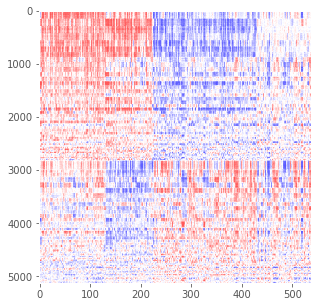

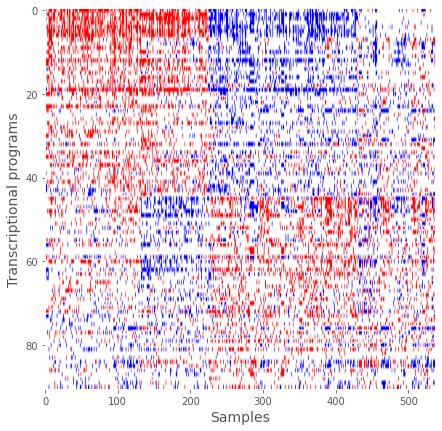

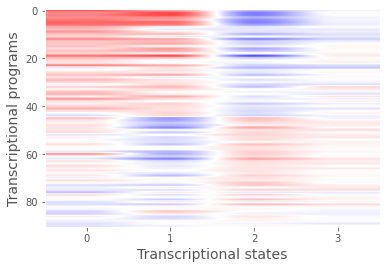

In [20]:
# import imp
# import miner
# imp.reload(miner)
input_path = os.getcwd()
#transcriptional_programs = miner.read_json(os.path.join(input_path,'GBM\\results\\MINER\\MINER_MicroLowessRNATMM.08.24.2020\\transcriptional_programs.json'))
#program_list = [transcriptional_programs[str(key)] for key in range(len(transcriptional_programs.keys()))]

dfr = overExpressedMembersMatrix-underExpressedMembersMatrix
mtrx = dfr.loc[np.hstack(program_list),np.hstack(states)]
plt.figure(figsize=(5,5))
plt.imshow(mtrx,cmap="bwr",vmin=-1.5,vmax=1.5,aspect=float(mtrx.shape[1])/float(mtrx.shape[0]))
plt.grid(False)
plt.savefig(os.path.join(resultsDirectory,"output/mosaic_allTFAndmiRNASig.pdf"),bbox_inches="tight")
# Determine activity of transcriptional programs in each sample
statesDf = miner.reduceModules(df=dfr.loc[np.hstack(program_list),np.hstack(states)],programs=program_list,states=states,stateThreshold=0.50,saveFile=os.path.join(resultsDirectory,"output/transcriptional_programsTFAndmiRNASig.pdf"))

# Cluster patients into subtypes and give the activity of each program in each subtype
programsVsStates = miner.programsVsStates(statesDf,states,filename=os.path.join(resultsDirectory,"output/programs_vs_statesTFAndmiRNASig.pdf"),showplot=True)

In [18]:
programsVsStates.columns = ['TS1','TS2','TS3','TS4','TS5','TS6','TS7','TS8','TS9','TS10','TS11','TS12','TS13','TS14','TS15','TS16']
print(programsVsStates)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(programsVsStates,cmap="bwr",vmin=-1,vmax=1,aspect="auto")
ax.set_xticks(np.arange(0, programsVsStates.shape[1], 2))
ax.set_xticklabels(['TS1','TS3','TS5','TS7','TS9','TS11','TS13','TS15','TS17'])
ax.set_yticks(np.arange(0, programsVsStates.shape[0], 3))
ax.set_yticklabels(['Pr-0','Pr-3','Pr-6','Pr-9','Pr-12','Pr-15','Pr-18','Pr-21','Pr-24','Pr-27','Pr-30', 'Pr-33', 'Pr-34', 'Pr-35'])
ax.grid(False)
plt.ylabel("Transcriptional programs",FontSize=14)
plt.xlabel("Transcriptional states",FontSize=14)

NameError: name 'programsVsStates' is not defined

# Run this only for miRNA inference

In [25]:
imp.reload(miner)
expressionData_FormiRNA = pd.read_csv("GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv", header = 0, index_col = 0)
regulonDfMicroGbm = pd.read_csv("regulonDfGbmMicroRNAmiRNARegulator.csv", header = 0)
regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
regulonModules = {}
for i in regulonDfMicroGbmlist:
    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
eigengenes = miner.getEigengenes(regulonModules,expressionData_FormiRNA,regulon_dict=None,saveFolder=None)
eigenScale = np.percentile(expressionData_FormiRNA,95)/np.percentile(eigengenes,95)
eigengenes = eigenScale*eigengenes
eigengenes.index = np.array(eigengenes.index).astype(str)
#regulons = {}
#regulatorslist = list(regulonDfMicroGbm['Regulator'].drop_duplicates())
#for i in regulatorslist:
#    temp_regulon_df = regulonDfMicroGbm[regulonDfMicroGbm['Regulator'] == i]
#    regulonslisttemp =  list(temp_regulon_df['Regulon_ID'].drop_duplicates())
#    temp_dict = {}
#    temp_num = 0
#    for j in regulonslisttemp:
#        temp_dict[temp_num]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==j]['Gene'])
#        temp_num = temp_num + 1
#    regulons[i]= temp_dict
referenceDf = eigengenes.copy()
referenceRegulonDf = regulonDfMicroGbm

# Run this if expression data not same as training data

In [2]:
import miner_py3_kk as miner3
import os
import pandas as pd
os.chdir('E:\\ISB work stuff\\Post-Doc_BaligaLab_GBMSYGNALProject')

expressionData=pd.read_csv("GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv",header=0,index_col=0,sep=",")
#arrayexpdf = miner3.zerofilter(expressionData)     
#expdf = arrayexpdf
#expdf = expdf.fillna(0)
#expdf = miner.removeNullRows(expdf)
#expdf = miner3.entropycheck(expdf)
#expressionData=miner.zscore(expdf)
#expressionData.to_csv("GSE7696_minerInputFiltered.csv")

# Run this for an updated regulon set

In [3]:
os.chdir('E:\\ISB work stuff\\Post-Doc_BaligaLab_GBMSYGNALProject')
expressionData_FormiRNA = pd.read_csv("GbmMicroRNAMergedmRNAMicroarraymiRNAZScoredData.csv", header = 0, index_col = 0)
input_path = os.getcwd()
regulonDfMicroGbm = pd.read_csv("regulonDfGbmMicroRNASigCoxAndStatSig.csv", header = 0)
regulonDfMicroGbmlist = list(regulonDfMicroGbm['Regulon_ID'].drop_duplicates())
regulonDfMicroGbmlist = [str(i) for i in regulonDfMicroGbmlist]
regulonDfMicroGbm["Regulon_ID"] = regulonDfMicroGbm["Regulon_ID"].astype(str)
regulonModules = {}
for i in regulonDfMicroGbmlist:
    regulonModules[i]= list(regulonDfMicroGbm[regulonDfMicroGbm['Regulon_ID']==i]['Gene'])
expressionData = expressionData_FormiRNA